In [10]:
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, plot_confusion_matrix

In [28]:
# load data
data = load_wine()
X, y = data.data, data.target 

# normalise data 
scaler = StandardScaler()
X = scaler.fit_transform(X)

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# initialise + train + predict
max_k = 10
train_error = []
test_error = []
for k in range(1, max_k):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf = clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)
    print(f".. k = {k}. Train acc = {round(100 * acc_train, 2)}%. Test acc = {round(100 * acc_test, 2)}%.")
    train_error.append(1-acc_train)
    test_error.append(1-acc_test)

.. k = 1. Train acc = 100.0%. Test acc = 91.67%.
.. k = 2. Train acc = 96.48%. Test acc = 91.67%.
.. k = 3. Train acc = 97.18%. Test acc = 94.44%.
.. k = 4. Train acc = 95.77%. Test acc = 91.67%.
.. k = 5. Train acc = 97.18%. Test acc = 97.22%.
.. k = 6. Train acc = 96.48%. Test acc = 97.22%.
.. k = 7. Train acc = 97.89%. Test acc = 97.22%.
.. k = 8. Train acc = 97.89%. Test acc = 94.44%.
.. k = 9. Train acc = 98.59%. Test acc = 97.22%.


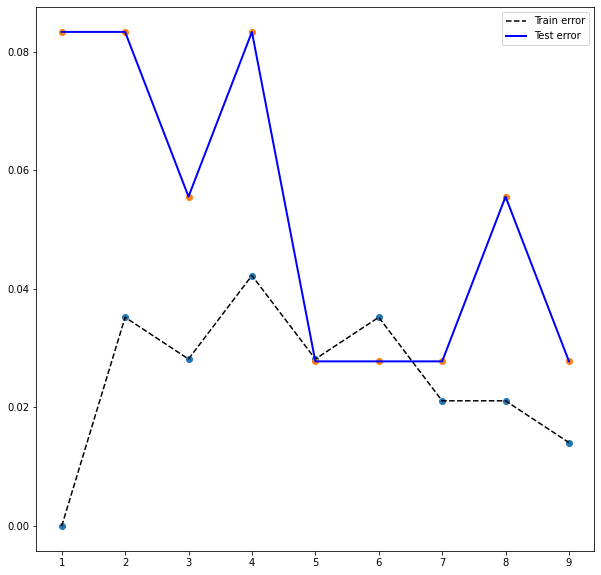

In [29]:
import matplotlib.pyplot as plt 
%matplotlib inline 

ks = range(1, max_k)
_ = plt.figure(figsize=(10, 10))
plt.plot(ks, train_error, 'k--')
plt.scatter(ks, train_error)
plt.plot(ks, test_error, 'b-', linewidth=2)
plt.scatter(ks, test_error)
plt.legend(["Train error", "Test error"])
plt.show()

In [31]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_neighbors': [1, 2, 6, 10, 20],
    'p': [1, 2, 3],
    'weights': ['uniform', 'distance']
}

gs = GridSearchCV(clf, params, scoring=accuracy_score)
gs = gs.fit(X_train, y_train)

/Users/luchicla/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass normalize=[2 2 1 1 1 0 0 0 0 0 1 0 2 1 0 1 2 2 0 0 0 2 1 1 2 1 1 1 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/luchicla/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luchicla/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/luchicla/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 74, in inner_f
    return f(**kwargs)
  File "/Users/luchicla/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classific

In [32]:
gs

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=9),
             param_grid={'n_neighbors': [1, 2, 6, 10, 20], 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             scoring=<function accuracy_score at 0x7f9cf0fa48c0>)

In [33]:
gs.best_estimator_

KNeighborsClassifier(n_neighbors=1, p=1)

In [35]:
y_test_pred = gs.best_estimator_.predict(X_test)
print(accuracy_score(y_test, y_test_pred))

0.9722222222222222
